In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Concrete_Data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
test_values = df.values
test_values.shape

(1030, 9)

In [4]:
m = test_values.shape[0]
X = np.c_[test_values[:,0:8],np.ones(m)]
X.shape

(1030, 9)

In [5]:
Y = test_values[:,8].reshape(test_values.shape[0],1)
Y.shape

(1030, 1)

In [6]:
title = ["Cement", "Blast-Furnace-Slag","Fly-Ash","Water","SuperPlasticizer","Coarse-Aggregate","Fine-Aggregate"]
colors = ["blue","red","green"]

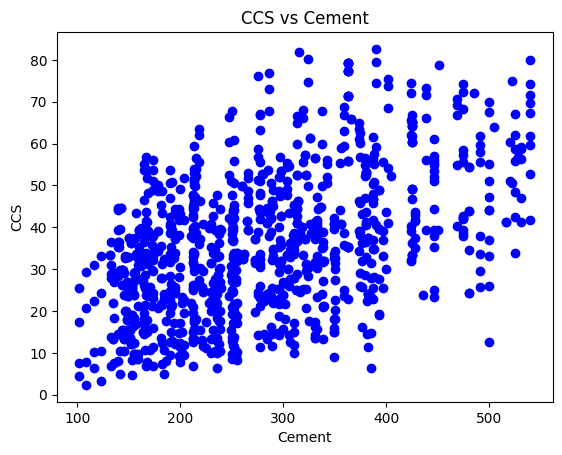

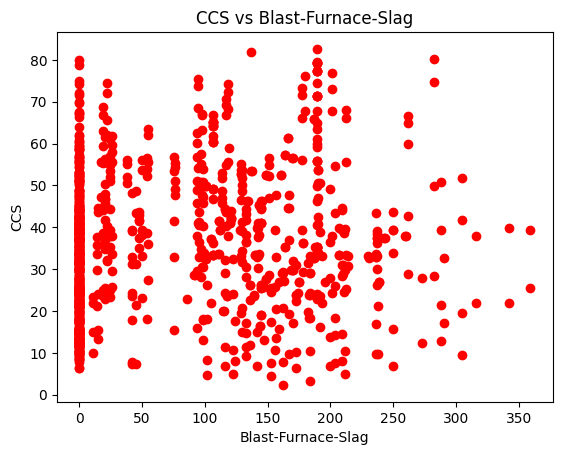

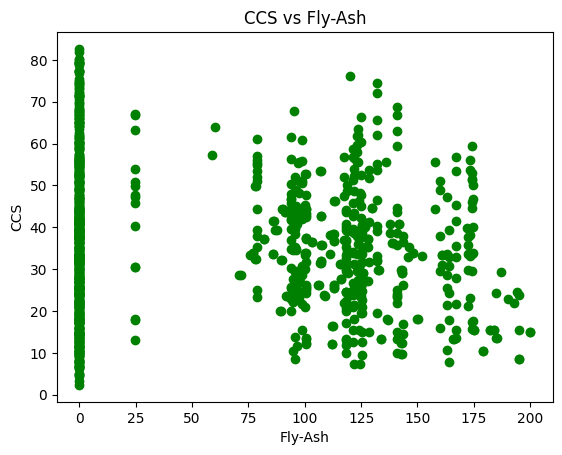

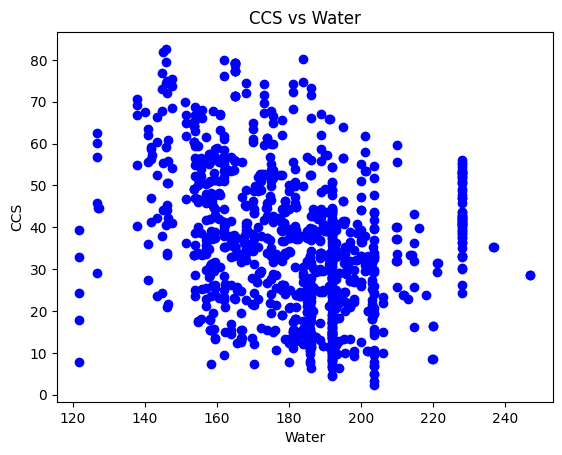

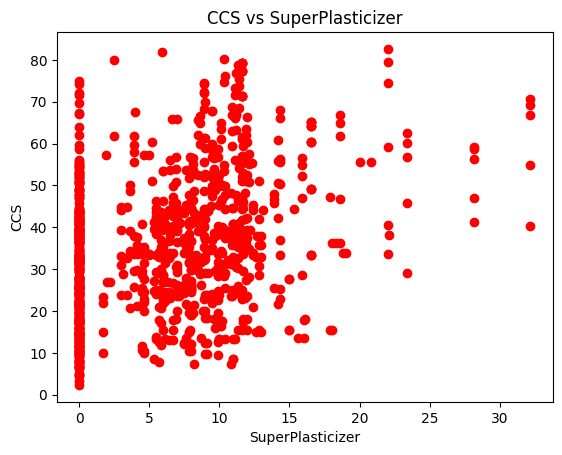

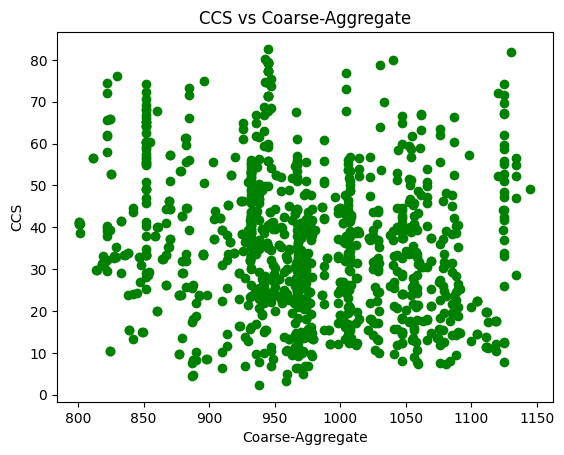

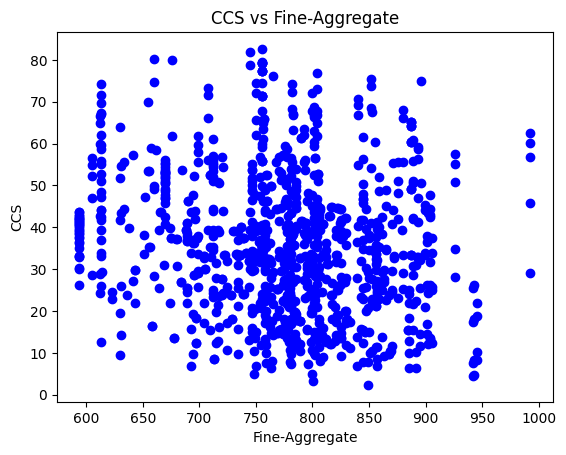

In [7]:
# Sub-part 1
for i in range(0,test_values.shape[1]-2):
    plt.figure()
    plt.title("CCS vs "+title[i])
    plt.xlabel(title[i])
    plt.ylabel("CCS")
    plt.scatter(test_values[:,i],Y, color=colors[i%3])
    plt.show()
    print("\n\n")

In [8]:
def cost(Y,Y_pred,M):
    total = 0.0
    N = Y.shape[0]
    Y = Y.reshape(N)
    Y_pred = Y_pred.reshape(N)
    for i in range(M):
        total = total + (Y[i] - Y_pred[i])**2
    Cost = total / (2*m)
    return Cost

In [9]:
def model(X,Y,learning_rate,iterations):
    M = Y.shape[0]
    theta = np.zeros(X.shape[1]).reshape(X.shape[1],1)
    Cost_list = []
    Cost = 0.0
    for i in range(iterations):
        y_pred = np.dot(X,theta)
        Cost = cost(Y,y_pred,M)
        Cost_list.append(Cost)
        
        d_theta = ((1/m) * (np.dot(X.T, (y_pred-Y))))
        
        theta = theta - learning_rate*d_theta
        if(i%1000 == 0):
            print("Epoch -",i,": Cost =",Cost)
#         print(theta,Cost)
#     theta = theta.reshape(X.shape[1])
    print("Final Cost -",Cost)
    return theta,Cost_list

In [10]:
# alpha = float(input("Enter Learning Rate:"))
# iters = int(input("Enter no.of iterations:"))
alpha = 1e-6
iters = 10000
theta,costlist = model(X,Y,alpha,iters)
theta

Epoch - 0 : Cost = 780.8686016504852
Epoch - 1000 : Cost = 59.368896663572905
Epoch - 2000 : Cost = 55.51991237400983
Epoch - 3000 : Cost = 54.43033622938267
Epoch - 4000 : Cost = 54.09751208876378
Epoch - 5000 : Cost = 53.991682534074215
Epoch - 6000 : Cost = 53.95422665831046
Epoch - 7000 : Cost = 53.937469865952444
Epoch - 8000 : Cost = 53.9270790239465
Epoch - 9000 : Cost = 53.918742306888625
Final Cost - 53.911167404308635


array([[ 1.19134161e-01],
       [ 1.03047245e-01],
       [ 9.10338993e-02],
       [-2.03605422e-01],
       [ 6.43496809e-02],
       [ 9.45137932e-03],
       [ 1.53996070e-02],
       [ 1.14638572e-01],
       [-1.30487208e-04]])

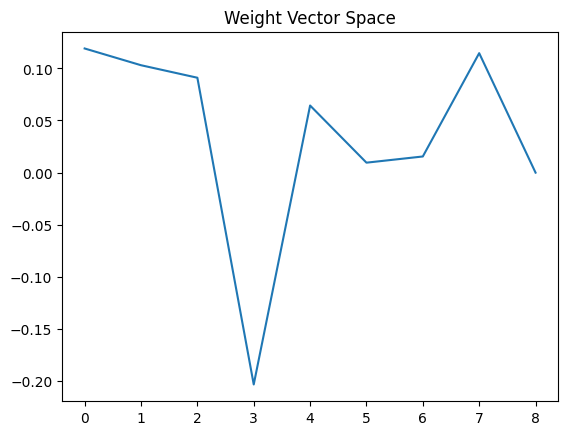

In [11]:
plt.figure()
plt.title("Weight Vector Space")
plt.plot(theta)
plt.show()

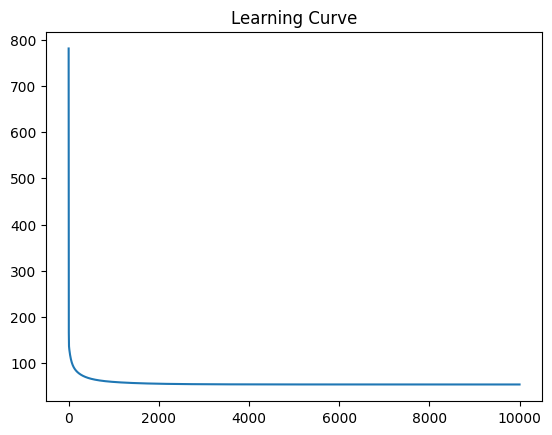

In [12]:
plt.figure()
plt.title("Learning Curve")
plt.plot(costlist)
plt.show()

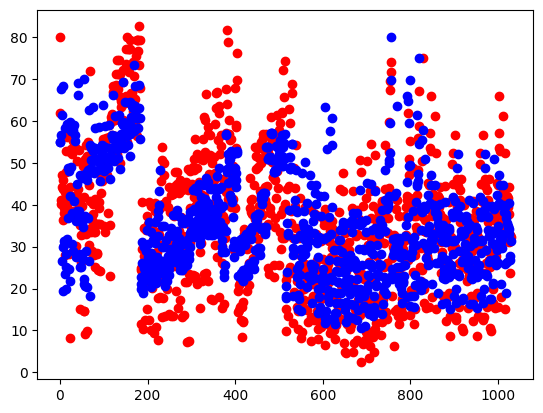

In [13]:
New_y = np.dot(X,theta)
x_length = np.arange(0,m)
plt.figure()
plt.scatter(x_length,Y, color="red")
plt.scatter(x_length,New_y, color="blue")
plt.show()

In [14]:
error = 0.0
for i in range(m):
    error += np.abs(Y[i][0] - New_y[i][0])
error /= m
error

8.22906503676179